# Assignment - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [17]:
#                       Ofir O. 5250


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: 
Goal: Get ideas for feature engineering and pipelines, plus clarification about avoiding data leakage.
Propmpt1: "I'm working with the California housing dataset. Can you suggest some possible feature-engineering ideas (like ratios or transformations) that could be useful? A couple of short code examples in pandas would help me get started."
    
Propmpt2: "I'm trying to build a scikit-learn pipeline that includes feature engineering, scaling, optional feature selection, and different models. Could you show me a small example of how such a pipeline could look, including how to set up GridSearchCV with R² scoring?"
    
Propmpt3: "I'm not fully sure how data leakage can happen when doing scaling or feature selection with cross-validation. Can you explain the right way to structure the pipeline to avoid leakage?"


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

<pre>
Learning problem:
This is a supervised regression problem: predict the median house value (MedHouseVal, measured in units of $100,000) for California districts using numerical features that describe income, house age, room/bedroom averages, population and geographic location (latitude & longitude). The dataset contains a train set and a test set supplied by the instructor; we will NOT re-split those files. The goal is to build a pipeline that includes feature engineering, optional feature selection / scaling, hyperparameter search using 5-fold cross validation (scoring by R²), and final evaluation on the provided test set. We will demonstrate EDA (distributions, correlations, and spatial patterns), try multiple pipeline permutations (Cartesian product of engineering choices and models), select the best permutation by average CV R², retrain on the full train set, and report test R² and RMSE as performance metrics.
</pre>


## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [18]:
import pandas as pd
import numpy as np

# === EDIT THESE PATHS to your actual files ===
TRAIN_PATH = "Data/housing_train.csv"
TEST_PATH = "Data/housing_test.csv"

# Load train & test (do NOT re-split)
train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)

In [19]:
# Show first 5 rows
print("----- TRAIN head -----")
display(train.head(5))
print("\n----- TEST head -----")
display(test.head(5))

----- TRAIN head -----


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250



----- TEST head -----


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


In [20]:
# Basic info
print("\nTrain shape:", train.shape)
print("Test shape:", test.shape)
print("\nTrain columns:", list(train.columns))


Train shape: (16512, 9)
Test shape: (4128, 9)

Train columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [21]:
# EDA visuals
import matplotlib.pyplot as plt
import seaborn as sns

# convenience
feature_cols = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]
target_col = "MedHouseVal"

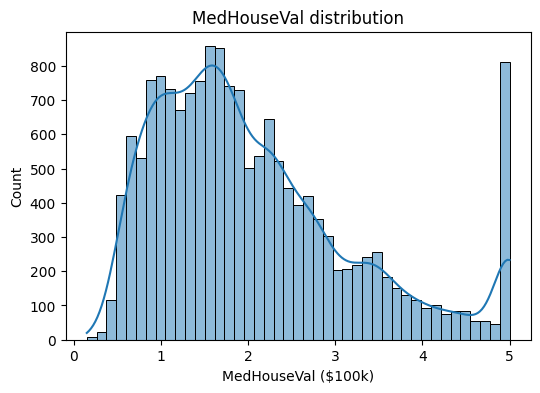

In [22]:
# 1) target distribution
plt.figure(figsize=(6,4))
sns.histplot(train[target_col], kde=True)
plt.title("MedHouseVal distribution")
plt.xlabel("MedHouseVal ($100k)")
plt.show()

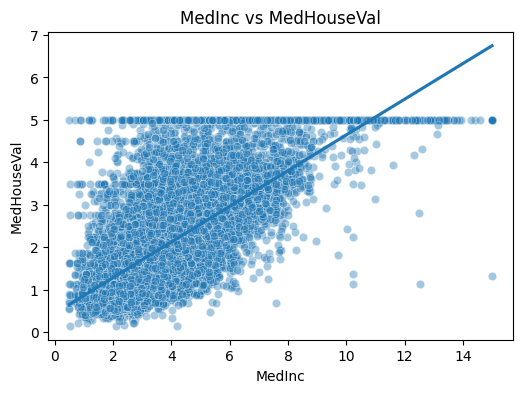

In [23]:
# 2) MedInc vs MedHouseVal
plt.figure(figsize=(6,4))
sns.scatterplot(x=train["MedInc"], y=train[target_col], alpha=0.4)
sns.regplot(x=train["MedInc"], y=train[target_col], scatter=False, ci=None)
plt.title("MedInc vs MedHouseVal")
plt.show()

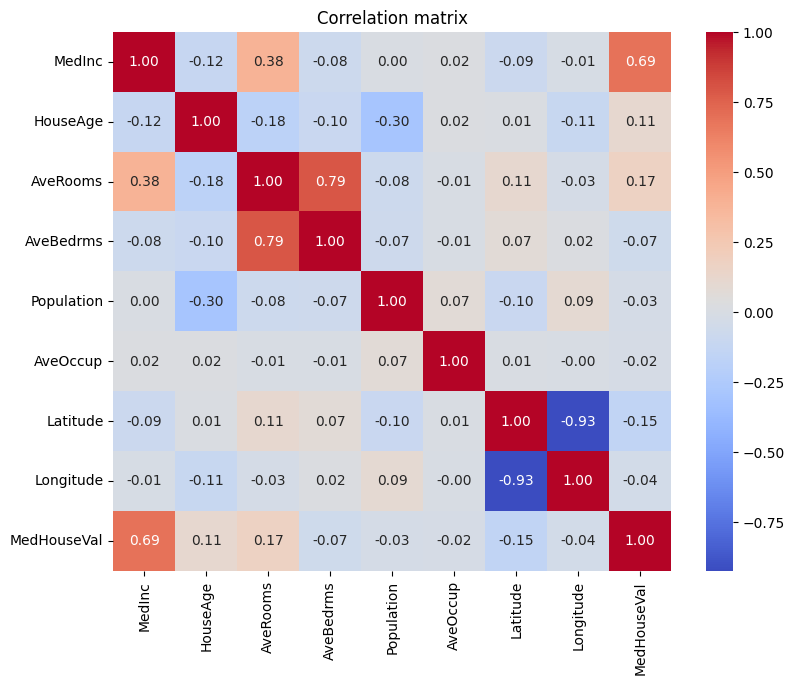

In [24]:
# 3) correlation heatmap (only numeric)
plt.figure(figsize=(9,7))
corr = train[feature_cols + [target_col]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [ ]:
print("1) Target distribution: shows how median house values are distributed and if there are outliers or clipping.")
print("2) MedInc vs MedHouseVal: checks correlation between median income and house value.")
print("3) Correlation heatmap: inspects multicollinearity and feature-target correlations.")


--- EDA explanations (paste these as short markdown comments) ---
1) Target distribution: shows how median house values are distributed and if there are outliers or clipping.
2) MedInc vs MedHouseVal: checks correlation between median income and house value.
3) Correlation heatmap: inspects multicollinearity and feature-target correlations.


## Part 3 - Experiments
You could add as many code cells as needed

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import joblib

# X, y (use only selected features)
X_train = train[feature_cols].copy()
y_train = train[target_col].copy()
X_test = test[feature_cols].copy()
y_test = test[target_col].copy()

# Feature-engineering function (in-pipeline, to avoid leakage)
def add_features_df(X_df):
    X = pd.DataFrame(X_df, columns=feature_cols).copy()
    # derived features
    # rooms_per_person: AveRooms / (Population / AveOccup) -> guard against div by zero
    denom = (X["Population"] / X["AveOccup"]).replace(0, np.nan)
    X["rooms_per_person"] = X["AveRooms"] / denom
    # beds_per_room
    X["beds_per_room"] = X["AveBedrms"] / X["AveRooms"].replace(0, np.nan)
    # interaction
    X["inc_rooms"] = X["MedInc"] * X["AveRooms"]
    # log population
    X["log_population"] = np.log1p(X["Population"].clip(lower=0))
    # fill inf/nan introduced by division
    X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
    return X.values  # return numpy array for pipeline compatibility

# Wrap as FunctionTransformer
feat_transformer = FunctionTransformer(add_features_df, validate=False)

# Build a pipeline skeleton (we will let GridSearch change scaler & model)
pipe = Pipeline([
    ("feat", feat_transformer),        # add derived features
    ("scaler", StandardScaler()),      # placeholder - will be tuned: StandardScaler/MinMax/ passthrough
    ("select", "passthrough"),
    ("model", RandomForestRegressor(random_state=42))
])

# Parameter grid
# - Feature-engineering metric: scaling option (StandardScaler vs MinMax vs none)
# - Model: RandomForest with 2 hyperparameters, each with 2 values
param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler(), "passthrough"],   # test scaling types vs no scaling
    "select": ["passthrough", SelectKBest(score_func=f_regression, k=7)],  # optional selection (one config)
    "model": [RandomForestRegressor(random_state=42)],
    "model__n_estimators": [100, 300],   
    "model__max_depth": [None, 10]       
}

# GridSearchCV: 5-fold, scoring by R^2 (regression). n_jobs=-1 to use all cores.
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=1, refit=True)
print("\n--- Running GridSearchCV (this may take a bit)... ---")
grid.fit(X_train.values, y_train.values)   # pass numpy arrays because FunctionTransformer uses columns order

# Save grid results and display
results_df = pd.DataFrame(grid.cv_results_)
# Keep relevant columns: params, mean & std test score, rank
display_cols = ["params", "mean_test_score", "std_test_score", "rank_test_score"]
grid_results = results_df[display_cols].sort_values("rank_test_score").reset_index(drop=True)
grid_results.to_csv("grid_results.csv", index=False)
print("\n--- Grid search completed. Top results saved to grid_results.csv ---")
display(grid_results.head(10))

# Best permutation & CV metrics
best_params = grid.best_params_
best_cv_r2 = grid.best_score_
best_cv_2powr = 2 ** best_cv_r2
print("\nBest params:", best_params)
print(f"Best CV mean R²: {best_cv_r2:.6f}")
print(f"Best CV mean 2^R²: {best_cv_2powr:.6f}")


--- Running GridSearchCV (this may take a bit)... ---
Fitting 5 folds for each of 24 candidates, totalling 120 fits

--- Grid search completed. Top results saved to grid_results.csv ---


,params,mean_test_score,std_test_score,rank_test_score
0,{'model': RandomForestRegressor(random_state=4...,0.796979,0.010249,1
1,{'model': RandomForestRegressor(random_state=4...,0.796948,0.010313,2
2,{'model': RandomForestRegressor(random_state=4...,0.796890,0.010373,3
3,{'model': RandomForestRegressor(random_state=4...,0.794570,0.010853,4
4,{'model': RandomForestRegressor(random_state=4...,0.794510,0.010930,5
5,{'model': RandomForestRegressor(random_state=4...,0.794461,0.011001,6
6,{'model': RandomForestRegressor(random_state=4...,0.773569,0.011645,7
7,{'model': RandomForestRegressor(random_state=4...,0.773488,0.011700,8
8,{'model': RandomForestRegressor(random_state=4...,0.773486,0.011674,9
9,{'model': RandomForestRegressor(random_state=4...,0.771883,0.012447,10



Best params: {'model': RandomForestRegressor(random_state=42), 'model__max_depth': None, 'model__n_estimators': 300, 'scaler': StandardScaler(), 'select': 'passthrough'}
Best CV mean R²: 0.796979
Best CV mean 2^R²: 1.737459


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [27]:
best_pipeline = Pipeline([
    ("feat", feat_transformer),
    ("scaler", best_params["scaler"]),
    ("select", best_params["select"]),
    ("model", RandomForestRegressor(
        n_estimators=best_params["model__n_estimators"],
        max_depth=best_params["model__max_depth"],
        random_state=42
    ))
])

# Train on full train set
best_pipeline.fit(X_train.values, y_train.values)



,steps,"[('feat', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,func,<function add...001888EA18820>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None


## Part 5 - Apply on test and show model performance estimation

In [28]:
# Predict on test set
y_pred = best_pipeline.predict(X_test.values)

# Show first 5 predictions
print("First 5 predictions on test set:")
for i in range(5):
    print(f"y_true: {y_test.values[i]:.3f}, y_pred: {y_pred[i]:.3f}")

# Evaluate model performance
r2_test = r2_score(y_test.values, y_pred)
r2_2pow_test = 2 ** r2_test
mse_test = mean_squared_error(y_test.values, y_pred)

print("\nTest set performance:")
print(f"R²: {r2_test:.6f}")
print(f"2^R²: {r2_2pow_test:.6f}")
print(f"MSE: {mse_test:.6f}")

First 5 predictions on test set:
y_true: 3.852, y_pred: 3.350
y_true: 2.457, y_pred: 2.484
y_true: 2.013, y_pred: 2.623
y_true: 1.052, y_pred: 1.131
y_true: 1.078, y_pred: 1.196

Test set performance:
R²: 0.823838
2^R²: 1.770109
MSE: 0.238987
